In [37]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn

# **Data Processing**


## **Step 1 - Import pandas and Load Dataset** 

In [38]:
import pandas as pd
dataset = "spotify-2023.csv"

# Try "utf-8" encoding if "utf-8" fails, try "latin-1" encoding
try:
    df = pd.read_csv(dataset, encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv(dataset, encoding="latin-1")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## **Step 2 - Handling Missing Values**

### Data Overview and Missing Values Analysis

In [39]:
total_features = len(df.columns)
total_tracks = len(df)
track_attributes = df.columns
print(f"Track Attributes: {track_attributes}")

# List to store track names and their null value counts
track_info = []

for column in track_attributes:
    null_count = df[column].isnull().sum()
    track_info.append((column, null_count))

print(f"Total number of features: {total_features}")
print(f"Total number of rows: {total_tracks}")

# Print the track information list
print("Track information (Track Attribute, Null Values Count):")
print(track_info)


Track Attributes: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')
Total number of features: 24
Total number of rows: 953
Track information (Track Attribute, Null Values Count):
[('track_name', 0), ('artist(s)_name', 0), ('artist_count', 0), ('released_year', 0), ('released_month', 0), ('released_day', 0), ('in_spotify_playlists', 0), ('in_spotify_charts', 0), ('streams', 0), ('in_apple_playlists', 0), ('in_apple_charts', 0), ('in_deezer_playlists', 0), ('in_deezer_charts', 0), ('in_shazam_charts', 50), ('bpm', 0), ('key', 95), ('mode', 0), ('danceability_%', 0), ('valence_%', 0), (

### Imputation Analysis

In [40]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
total_columns_with_missing_values = len(columns_with_missing_values)

print(f"Total number of columns with missing values: {total_columns_with_missing_values}")

if total_columns_with_missing_values > 0:
    print("Columns with missing values:")
    for column in columns_with_missing_values.index:
        dtype = df[column].dtype
        print(f"{column}: {dtype}")
        # print(f"{columns_with_missing_values}: {dtype}")
    # print(columns_with_missing_values.index.tolist())
else:
    print("No columns have missing values.")


Total number of columns with missing values: 2
Columns with missing values:
in_shazam_charts: object
key: object


### Key Column Insights - Frequencies and Null Values Analysis

In [41]:
key_counts = df['key'].value_counts(dropna=False)
print("Unique Keys, Their Frequencies, and Number of Null Values:")

for key, count in key_counts.items():
    is_null = pd.isnull(key)
    print(f"Key: {key}, Frequency: {count}, Null Value: {is_null}")


Unique Keys, Their Frequencies, and Number of Null Values:
Key: C#, Frequency: 120, Null Value: False
Key: G, Frequency: 96, Null Value: False
Key: nan, Frequency: 95, Null Value: True
Key: G#, Frequency: 91, Null Value: False
Key: F, Frequency: 89, Null Value: False
Key: B, Frequency: 81, Null Value: False
Key: D, Frequency: 81, Null Value: False
Key: A, Frequency: 75, Null Value: False
Key: F#, Frequency: 73, Null Value: False
Key: E, Frequency: 62, Null Value: False
Key: A#, Frequency: 57, Null Value: False
Key: D#, Frequency: 33, Null Value: False


### Mode Imputation on Key Column

In [42]:
if df['key'].isnull().any():
    mode_value = df['key'].mode().iloc[0]
    df['key'].fillna(mode_value, inplace=True)
    print(f"Missing values in 'key' column after imputation: {df['key'].isnull().sum()}")
    
else:
    print("No missing values in 'key' column.")

print(mode_value) # for reference
print(df.head())

df.to_csv('key_imputation.csv', index=False)


Missing values in 'key' column after imputation: 0
C#
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   

### Null Values Verification for Key Column

In [43]:
# Print unique keys, their frequencies, and number of null values
key_counts = df['key'].value_counts(dropna=False)

print("Unique Keys, Their Frequencies, and Number of Null Values:")
for key, count in key_counts.items():
    is_null = pd.isnull(key)
    print(f"Key: {key}, Frequency: {count}, Null Value: {is_null}")


Unique Keys, Their Frequencies, and Number of Null Values:
Key: C#, Frequency: 215, Null Value: False
Key: G, Frequency: 96, Null Value: False
Key: G#, Frequency: 91, Null Value: False
Key: F, Frequency: 89, Null Value: False
Key: B, Frequency: 81, Null Value: False
Key: D, Frequency: 81, Null Value: False
Key: A, Frequency: 75, Null Value: False
Key: F#, Frequency: 73, Null Value: False
Key: E, Frequency: 62, Null Value: False
Key: A#, Frequency: 57, Null Value: False
Key: D#, Frequency: 33, Null Value: False


### Imputation Analysis for in_shazam_charts Column

In [44]:
# figuring out which imputation is right for in_shazam_charts column
# Understanding the distribution of the in_shazam_charts column before deciding on the imputation method.

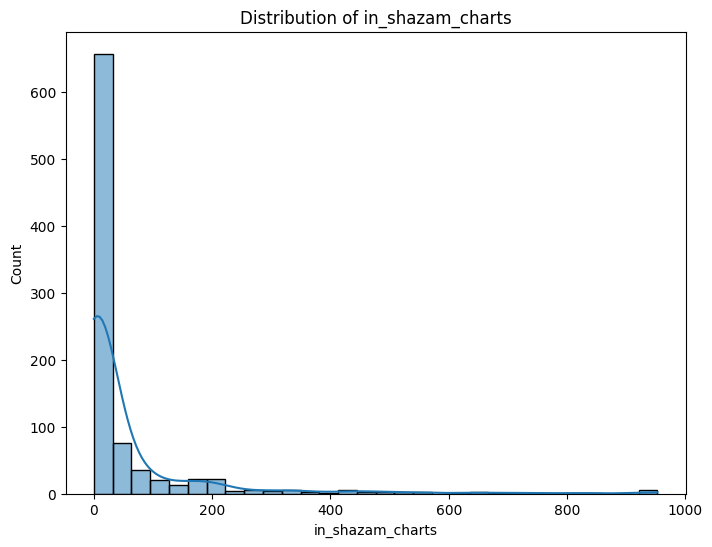

Mean: 51.176339285714285
Median: 2.0
Mode: 0.0


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['in_shazam_charts'].dropna(), bins=30, kde=True)
plt.title('Distribution of in_shazam_charts')
plt.show()

# Calculate mean, median, and mode
mean_value = df['in_shazam_charts'].mean()
median_value = df['in_shazam_charts'].median()
mode_value = df['in_shazam_charts'].mode().iloc[0]

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")


### Median Imputation on in_shazam_charts

In [46]:
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

median_value = df['in_shazam_charts'].median()

df['in_shazam_charts'].fillna(median_value, inplace=True)

df.to_csv('shazam_imputation.csv', index=False)


In [47]:
# cross verifing if there any null values in the in_shazam_charts

In [48]:
# Check for missing values in the 'in_shazam_charts' column
missing_values_shazam = df['in_shazam_charts'].isnull().sum()

print(f"Missing values in 'in_shazam_charts' column after imputation: {missing_values_shazam}")


Missing values in 'in_shazam_charts' column after imputation: 0


## **Step 2 - Handling Outliers**

### Exploratory Data Analysis: Feature Distribution Visualization

In [49]:
# Before handling outliers thought of seeing all features/column's distribution

<Figure size 3000x2500 with 0 Axes>

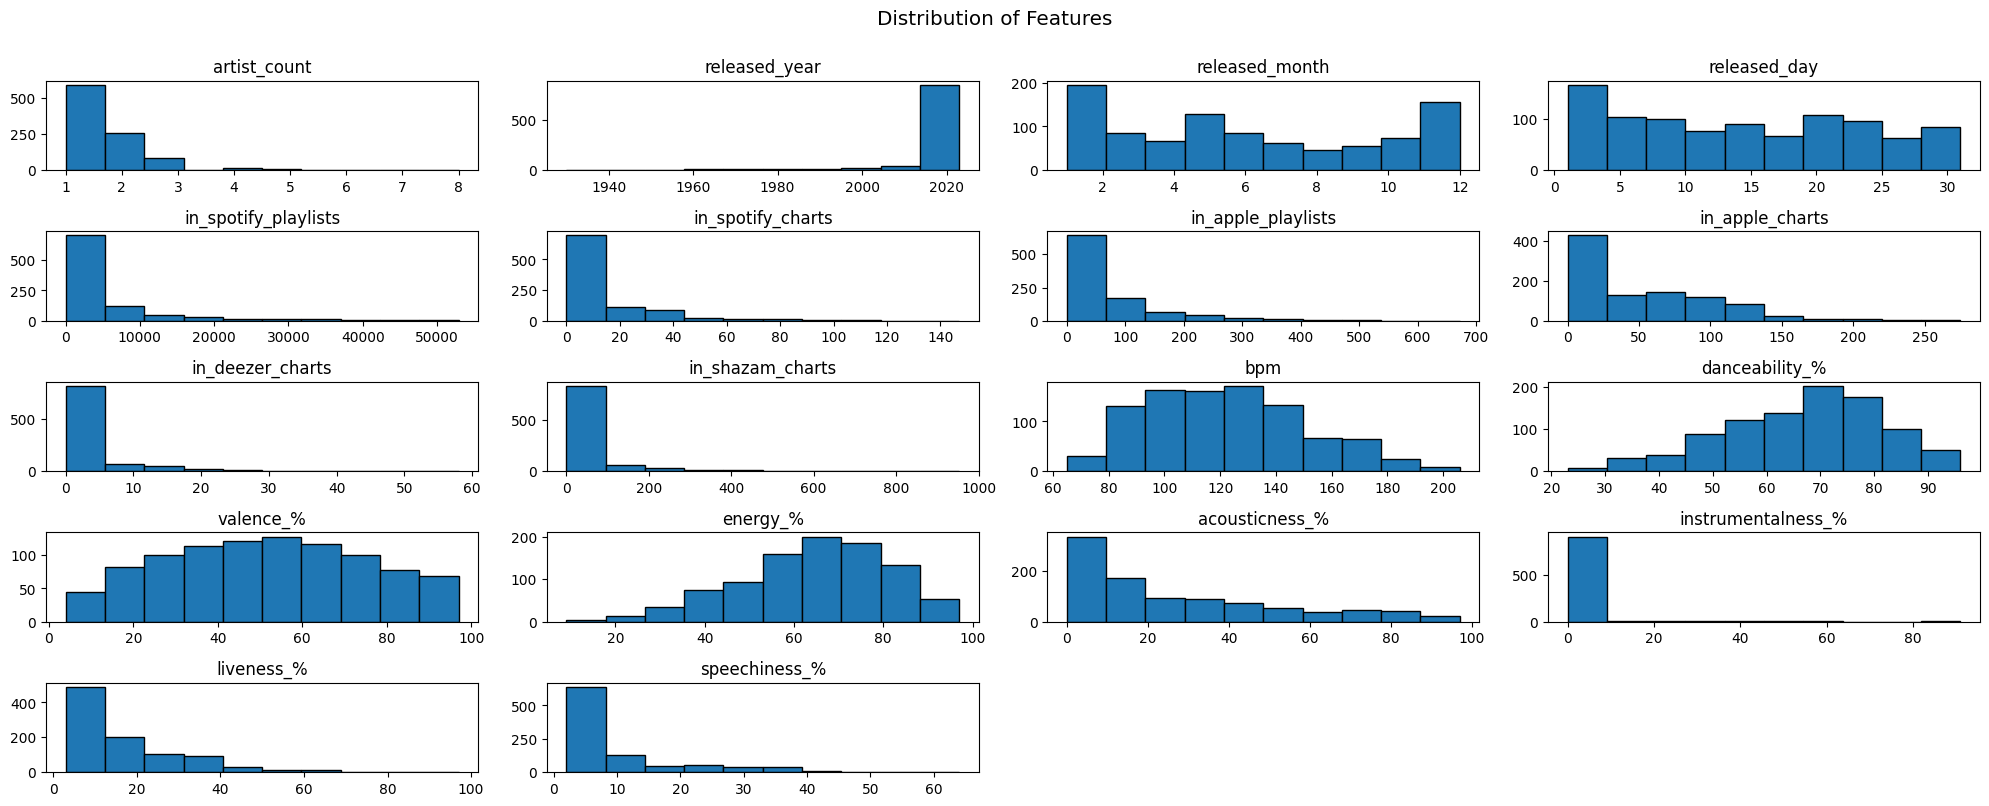

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size
plt.figure(figsize=(30, 25))

# Create histograms for all columns in the dataset
df.hist(bins=10, edgecolor='black', linewidth=1, grid=False, layout=(9, 4), figsize=(20, 15))
plt.suptitle('Distribution of Features', x=0.5, y=0.92, ha='center', fontsize='x-large')
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


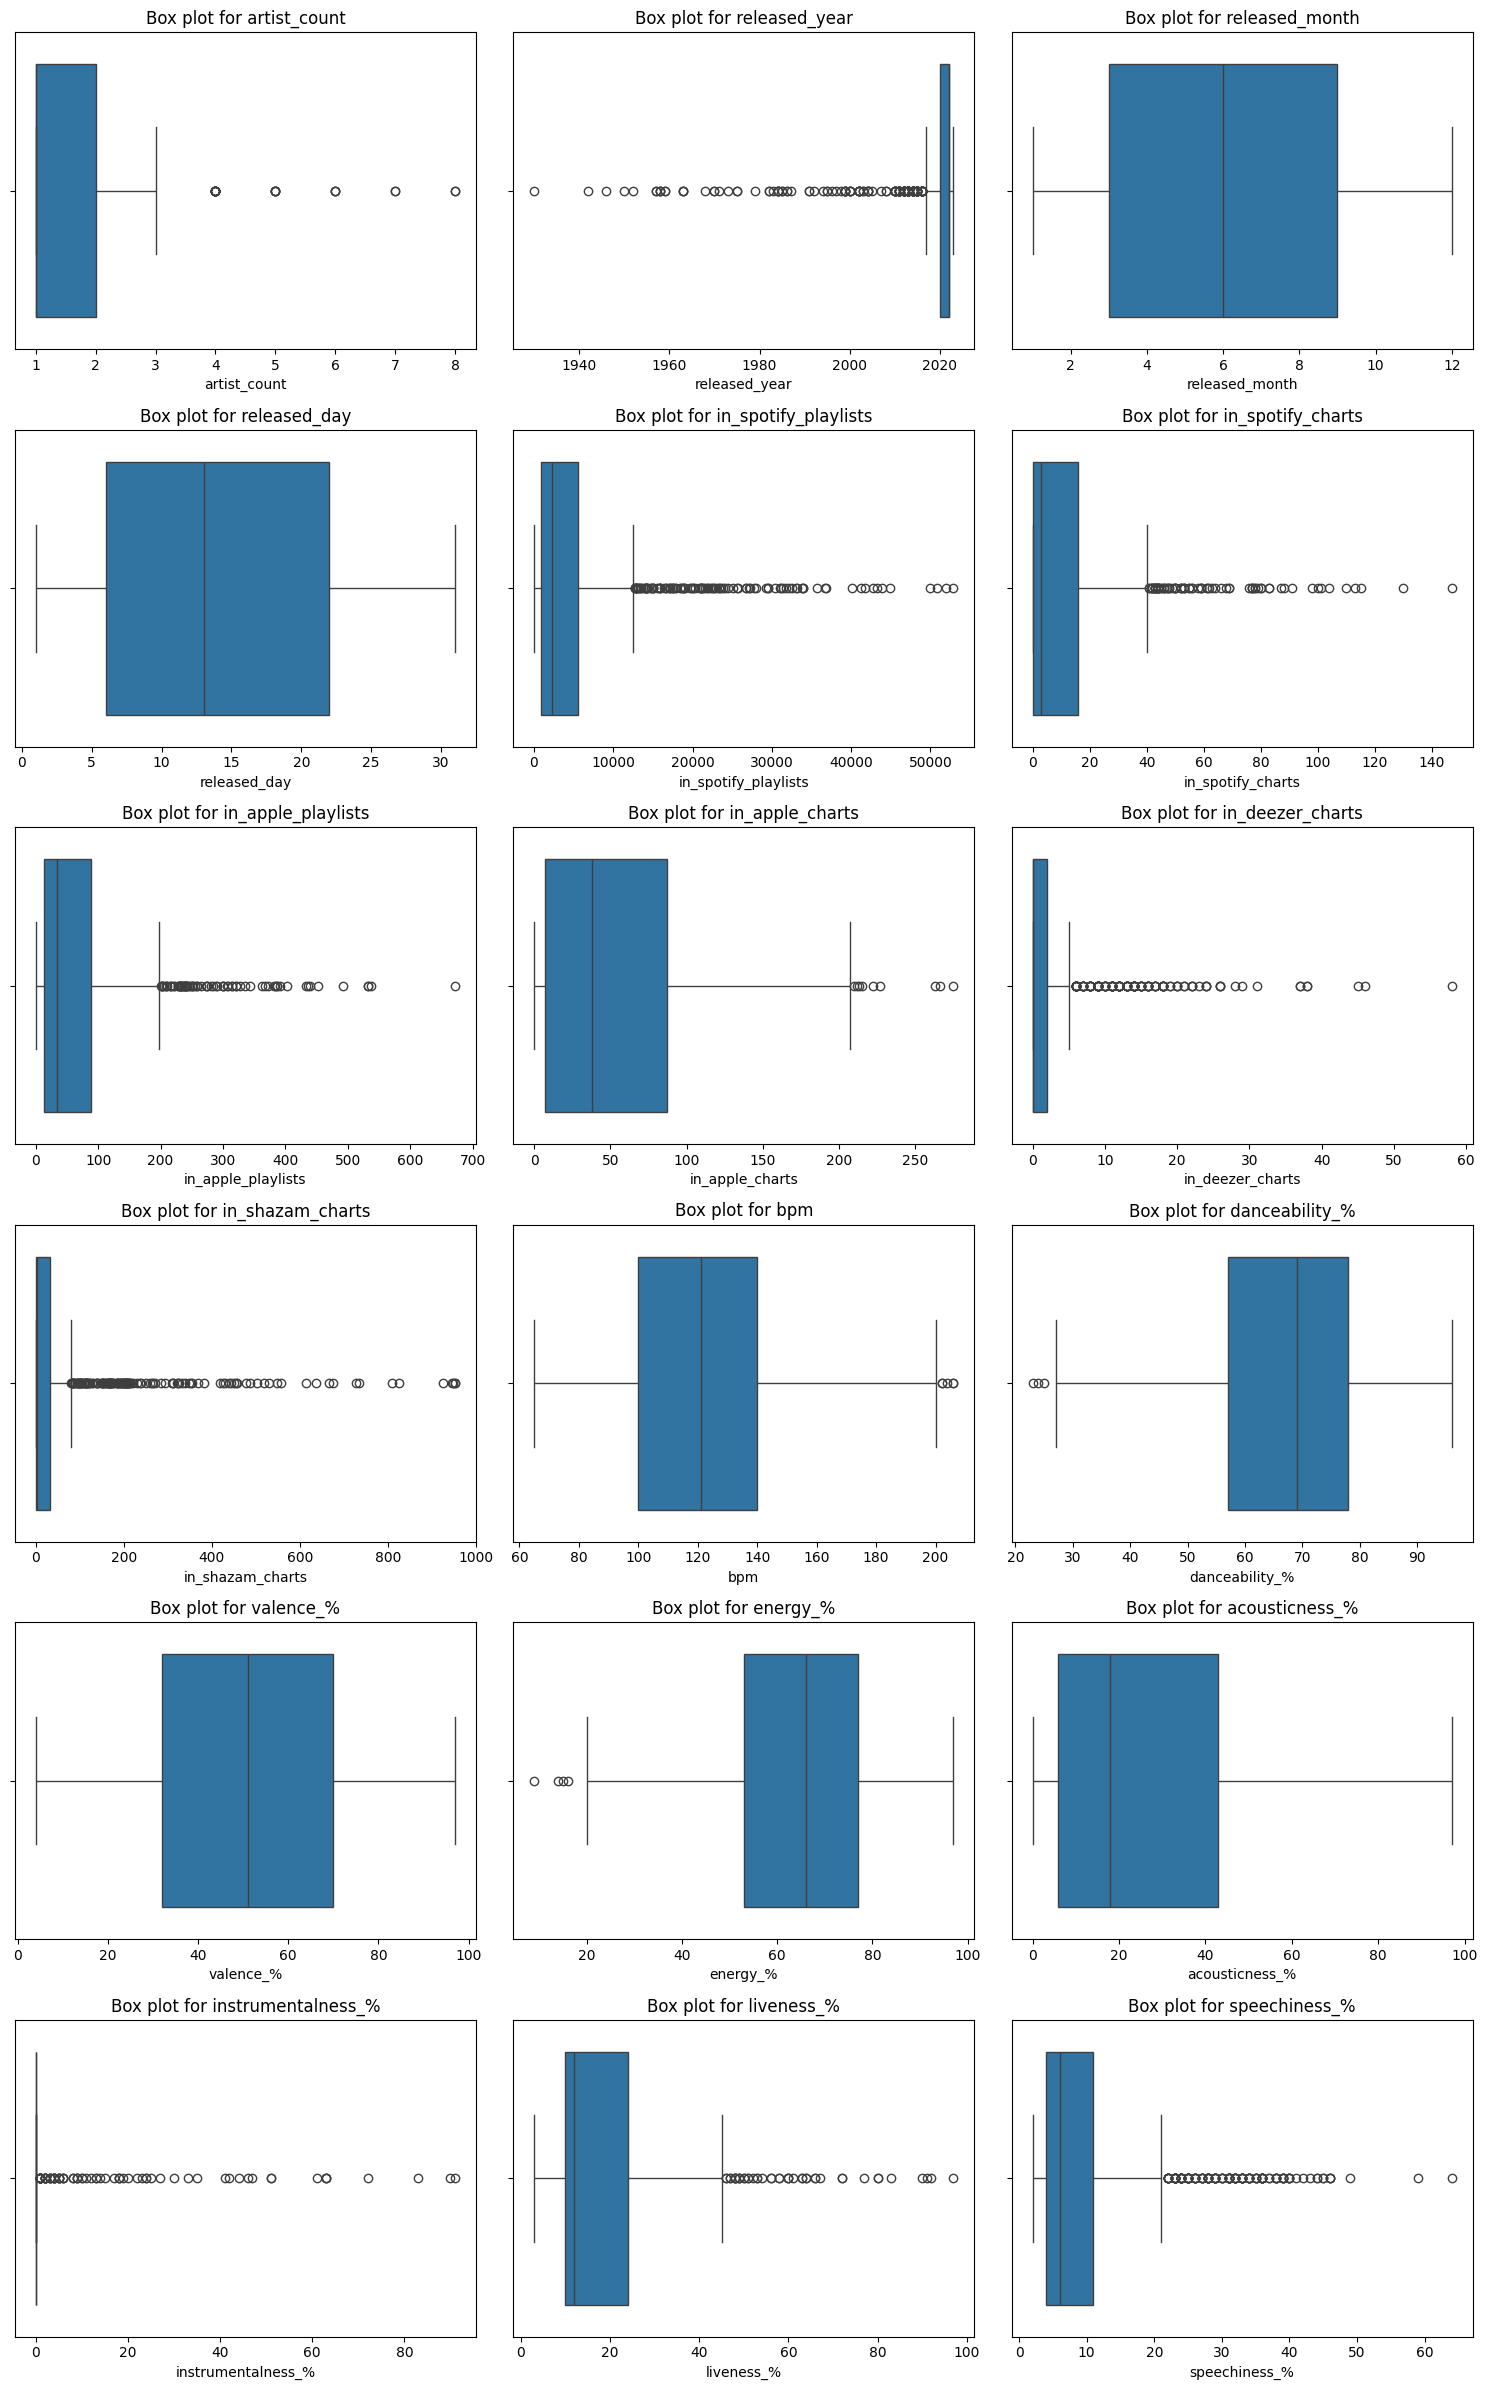

In [51]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_for_columns(dataframe):
    # Filter out numeric columns
    numeric_columns = [column for column in dataframe.columns if dataframe[column].dtype in ['int64', 'float64']]
    
    # Determine the number of rows and columns for the subplots
    n = len(numeric_columns)
    ncols = 3  # Number of columns in the grid
    nrows = math.ceil(n / ncols)
    
    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
    
    # Flatten axes for easier iteration
    axes = axes.ravel()

    # Plot each column's box plot on its respective subplot
    for i, column in enumerate(numeric_columns):
        sns.boxplot(x=dataframe[column], ax=axes[i])
        axes[i].set_title(f"Box plot for {column}")
    
    # Remove any unused subplots
    for j in range(i+1, nrows*ncols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_boxplots_for_columns(df)


## Observations from above Distributions: 
#### Streams seems to have a right-skewed distribution with a long tail.
#### In_Spotify_Playlists, In_Apple_Playlists, In_Apple_Charts, In_Spotify_Charts columns also show right-skewed distributions
#### Released_Year: Depending on the distribution need to investigate if there are any outliers in this column.
#### In_Deezer_Charts, In_Shazam_Chart these columns exhibit some right-skewness.
#### BPM (Beats Per Minute): Should Check for outliers, especially if there are extreme values.

### Streams Distribution Analysis after Data Cleaning

<Figure size 1500x1000 with 0 Axes>

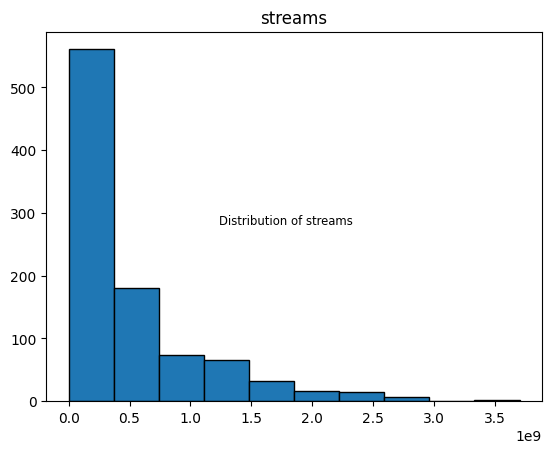

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'streams' column to numeric (ignoring errors)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Drop rows with missing values in 'streams'
df_cleaned = df.dropna(subset=['streams'])

# Create histograms for all columns in the cleaned dataset, including 'streams'
plt.figure(figsize=(15, 10))
df_cleaned.hist(column=['streams'], bins=10, edgecolor='black', linewidth=1, grid=False)
plt.suptitle('Distribution of streams', x=0.5, y=0.5, ha='center', fontsize='small')
plt.show()


### Identifing Outliers using the IQR method:

In [53]:
def identify_outliers(df, cols):
    outliers_dict = {}

    for col in cols:
        # Calculate the first and third quartiles
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Identify outliers based on the IQR
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]

        # Store outliers in the dictionary
        outliers_dict[col] = outliers

    return outliers_dict

# List of columns to examine for outliers
columns_to_examine = ['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_apple_charts', 'in_spotify_charts', 'released_year', 'in_deezer_charts', 'in_shazam_charts', 'bpm']

# Identify outliers for the specified columns
outliers_result = identify_outliers(df, columns_to_examine)

# Print or examine the outliers for each column
for col, outliers in outliers_result.items():
    print(f"Outliers in {col}:")
    print(outliers)
    print("\n")


Outliers in streams:
                                        track_name         artist(s)_name  \
14                                       As It Was           Harry Styles   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   
47                                     Die For You             The Weeknd   
48                                         Starboy  The Weeknd, Daft Punk   
54                                    Another Love              Tom Odell   
..                                             ...                    ...   
754                There's Nothing Holdin' Me Back           Shawn Mendes   
761                                     Photograph             Ed Sheeran   
762                                  Love Yourself          Justin Bieber   
871                            Sweet Child O' Mine          Guns N' Roses   
910                                  The Scientist               Coldplay   

     artist_count  released_year  released_month  rele

#### In the above code:

#### We calculate the first quartile (Q1) and third quartile (Q3). The Interquartile Range (IQR) is calculated as the difference between Q3 and Q1. We define lower and upper bounds to identify outliers based on the IQR. Outliers are identified as values outside the lower and upper bounds. The identified outliers are then capped at the upper bound. Feel free to adjust the IQR multiplier (1.5 in this case) based on your dataset and requirements. You can also explore other methods for handling outliers based on your specific needs.

In [54]:
df_before = df.copy() # wanted to take a backup before handling outliers

#### From my examination of number of outliers and distribution I would like to handle outliers in in_spotify_charts, in_apple charts, in_apple_playlists, in_spotify_playlists, streams and ignore in_shazam_chars, in_deezer_charts and released year columns for now and as bpm has only 5 outliers. I want to handle it by remove those lines and appling log transformation on the rest of the columns

### Handling Outliers on bpm column 

In [55]:
Q1_bpm = df['bpm'].quantile(0.25)
Q3_bpm = df['bpm'].quantile(0.75)
IQR_bpm = Q3_bpm - Q1_bpm

# Remove values outside [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
df = df[(df['bpm'] >= Q1_bpm - 1.5 * IQR_bpm) & (df['bpm'] <= Q3_bpm + 1.5 * IQR_bpm)]

df.reset_index(drop=True, inplace=True)


### Handling Outliers on Selected columns 

In [56]:
import numpy as np
columns_to_handle = ['in_spotify_charts', 'in_apple_charts', 'in_apple_playlists', 'in_spotify_playlists', 'streams']

for col in columns_to_handle:
    
    Q1_col = df[col].quantile(0.25)
    Q3_col = df[col].quantile(0.75)
    IQR_col = Q3_col - Q1_col

    df = df[(df[col] >= Q1_col - 1.5 * IQR_col) & (df[col] <= Q3_col + 1.5 * IQR_col)]

    # Applying log transformation to 'col'
    df[col] = np.log1p(df[col])


### Outlier Handling Impact: Comparative Analysis of Selected Features

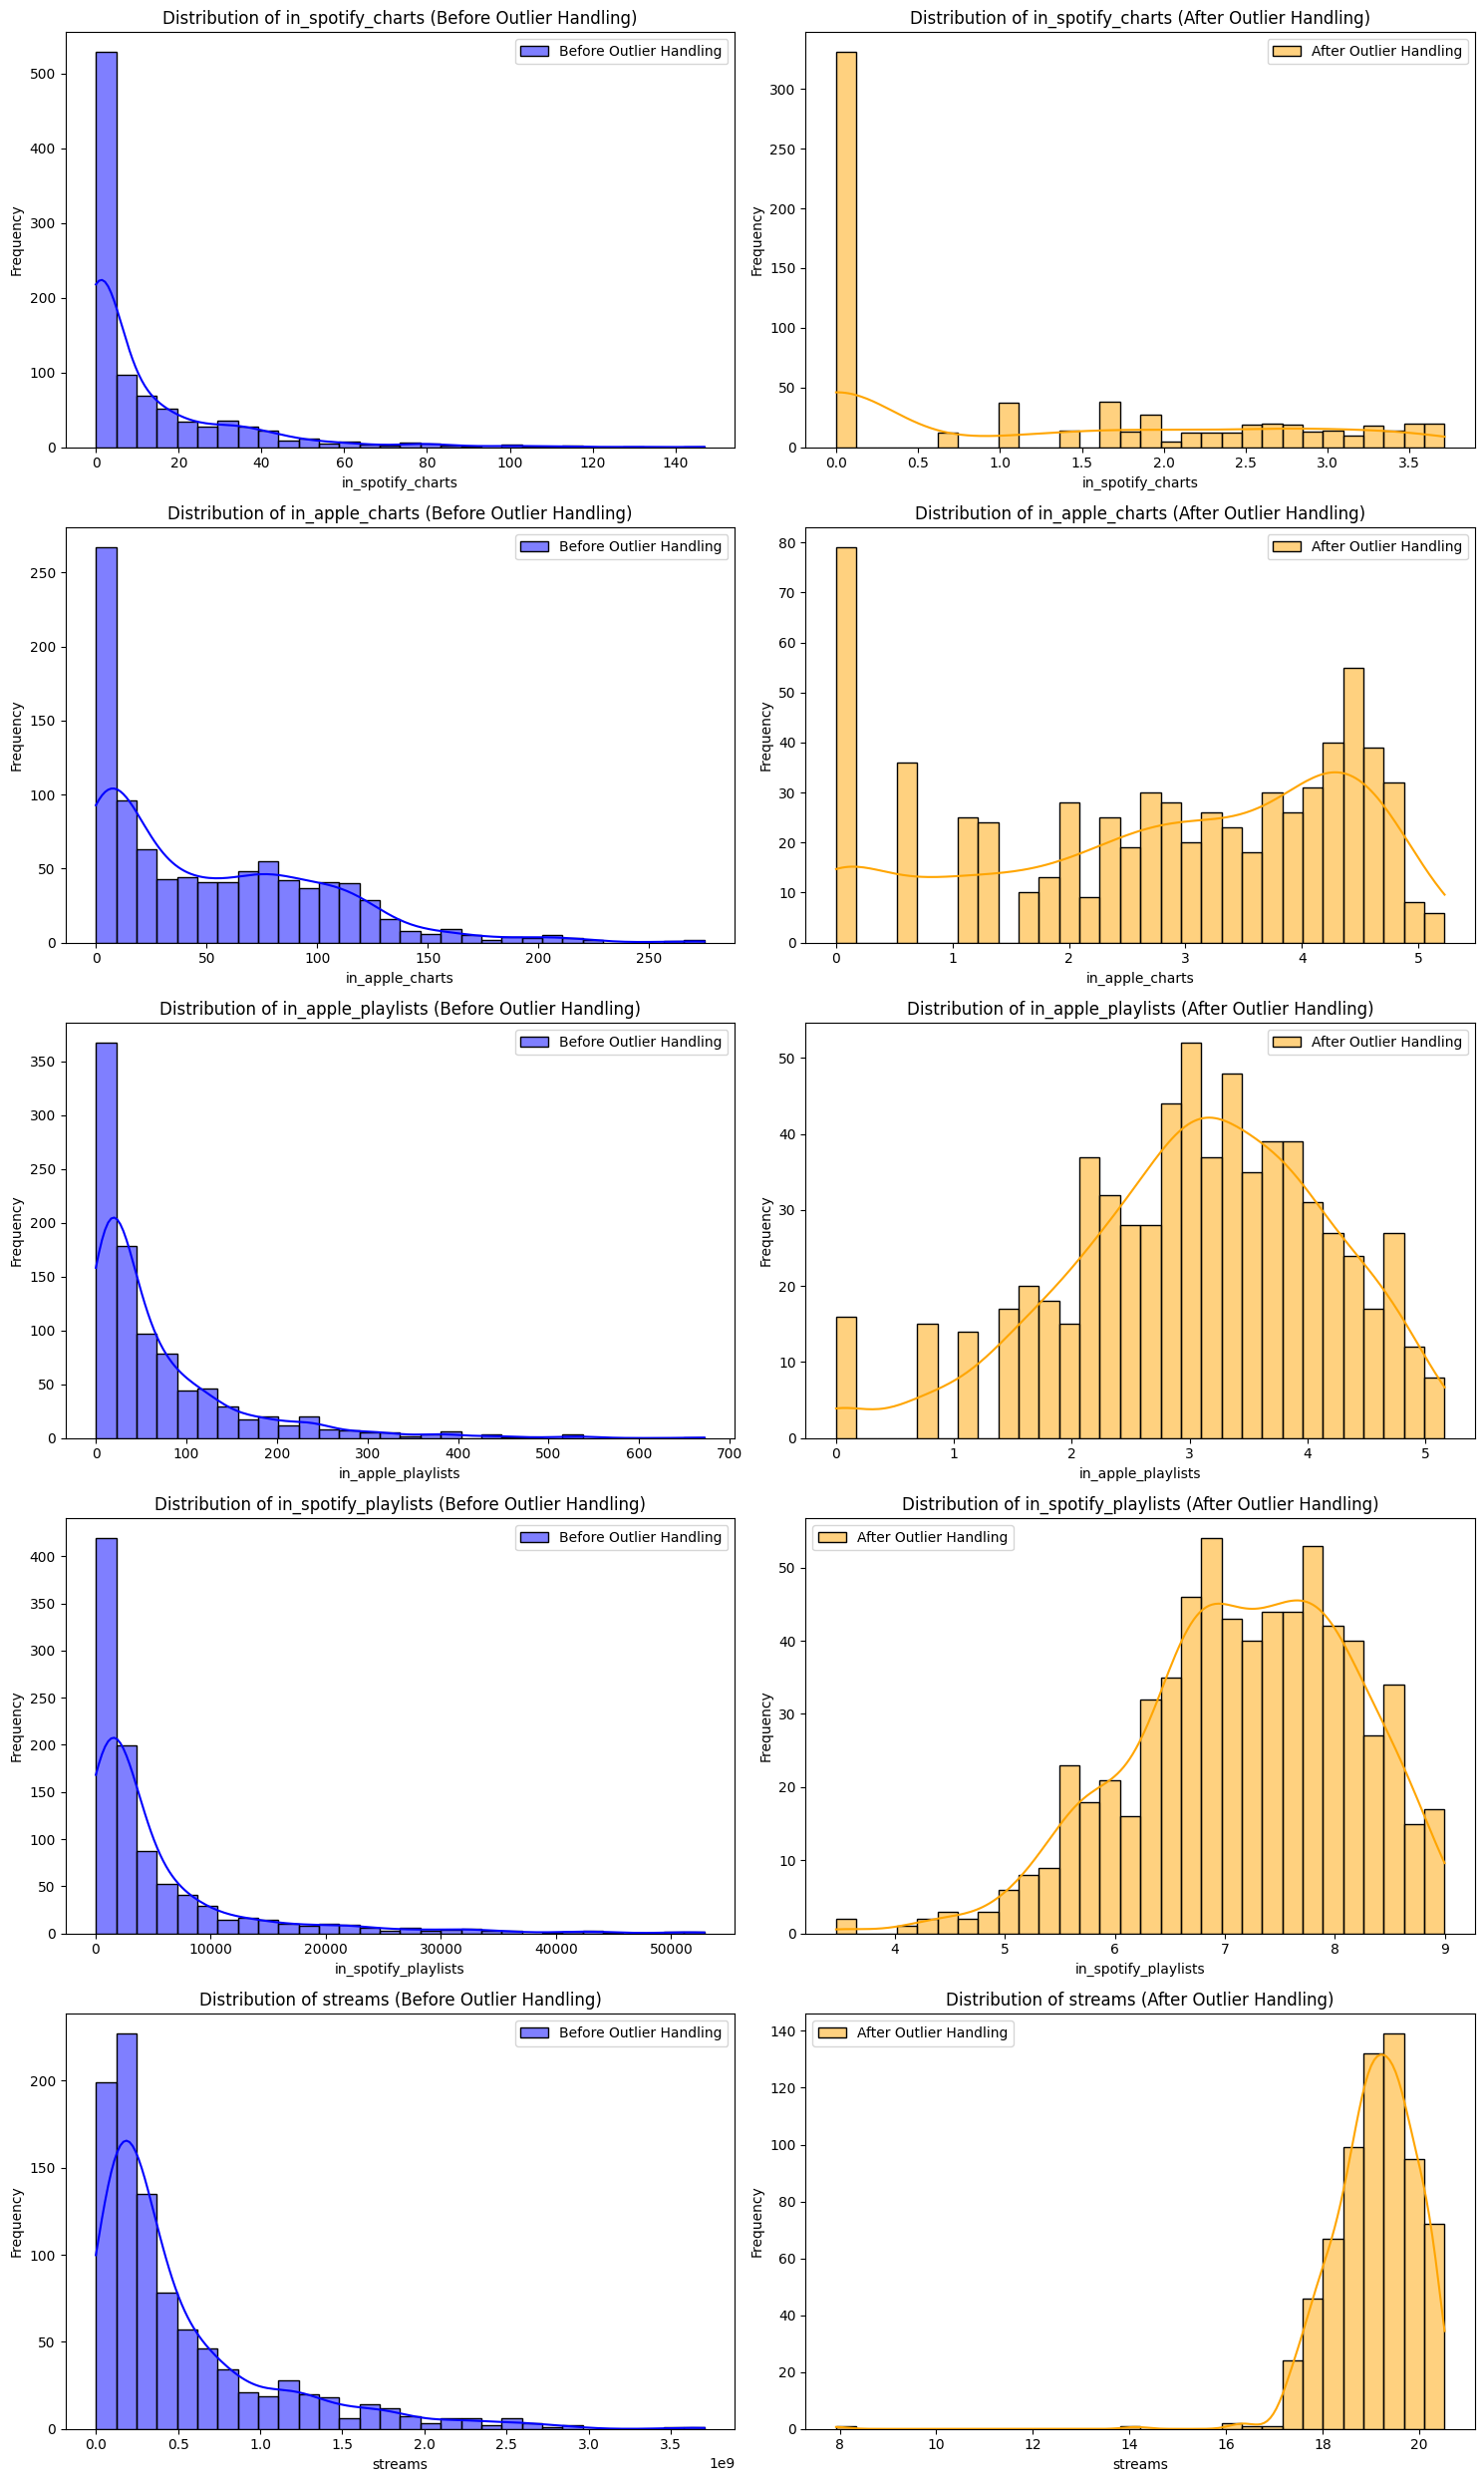

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
# columns_to_check = ['bpm', 'in_spotify_charts', 'in_apple_charts', 'in_apple_playlists', 'in_spotify_playlists', 'streams']
columns_to_check = ['in_spotify_charts', 'in_apple_charts', 'in_apple_playlists', 'in_spotify_playlists', 'streams']


num_cols = 2
num_rows = len(columns_to_check) 
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axs = axs.flatten()

# Plot histograms
for i, column in enumerate(columns_to_check):
    # Before handling outliers
    sns.histplot(df_before[column], bins=30, kde=True, color='blue', label='Before Outlier Handling', ax=axs[i*2])
    axs[i*2].set_title(f'Distribution of {column} (Before Outlier Handling)')
    axs[i*2].set_xlabel(column)
    axs[i*2].set_ylabel('Frequency')
    axs[i*2].legend()

    # After handling outliers
    sns.histplot(df[column], bins=30, kde=True, color='orange', label='After Outlier Handling', ax=axs[i*2+1])
    axs[i*2+1].set_title(f'Distribution of {column} (After Outlier Handling)')
    axs[i*2+1].set_xlabel(column)
    axs[i*2+1].set_ylabel('Frequency')
    axs[i*2+1].legend()

plt.tight_layout()
plt.show()


### Summary Statistics - Before and After Outlier Handling

In [58]:

# columns_to_check = ['bpm', 'in_spotify_charts', 'in_apple_charts', 'in_apple_playlists', 'in_spotify_playlists', 'streams']
columns_to_check = ['in_spotify_charts', 'in_apple_charts', 'in_apple_playlists', 'in_spotify_playlists', 'streams']


print("Summary Statistics Before Outlier Handling:")
print(df_before[columns_to_check].describe())

print("\nSummary Statistics After Outlier Handling:")
print(df[columns_to_check].describe())


Summary Statistics Before Outlier Handling:
       in_spotify_charts  in_apple_charts  in_apple_playlists  \
count         953.000000       953.000000          953.000000   
mean           12.009444        51.908709           67.812172   
std            19.575992        50.630241           86.441493   
min             0.000000         0.000000            0.000000   
25%             0.000000         7.000000           13.000000   
50%             3.000000        38.000000           34.000000   
75%            16.000000        87.000000           88.000000   
max           147.000000       275.000000          672.000000   

       in_spotify_playlists       streams  
count            953.000000  9.520000e+02  
mean            5200.124869  5.141374e+08  
std             7897.608990  5.668569e+08  
min               31.000000  2.762000e+03  
25%              875.000000  1.416362e+08  
50%             2224.000000  2.905309e+08  
75%             5542.000000  6.738690e+08  
max            528

## **Step 3 - Feature Scaling**

###  Original vs. Min-Max Scaled Distributions

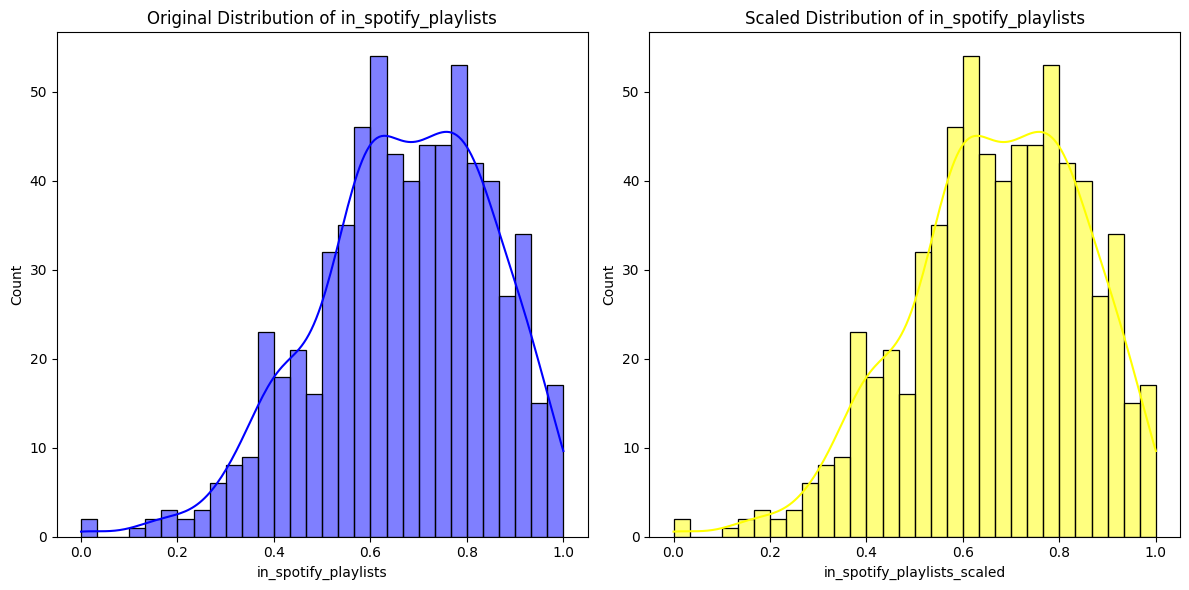

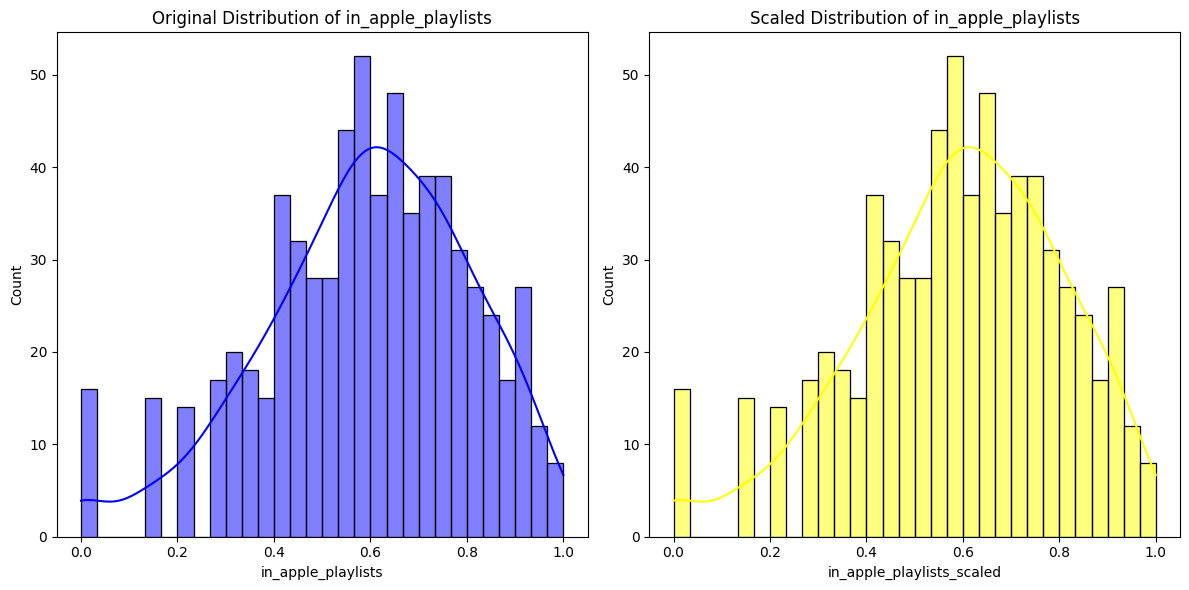

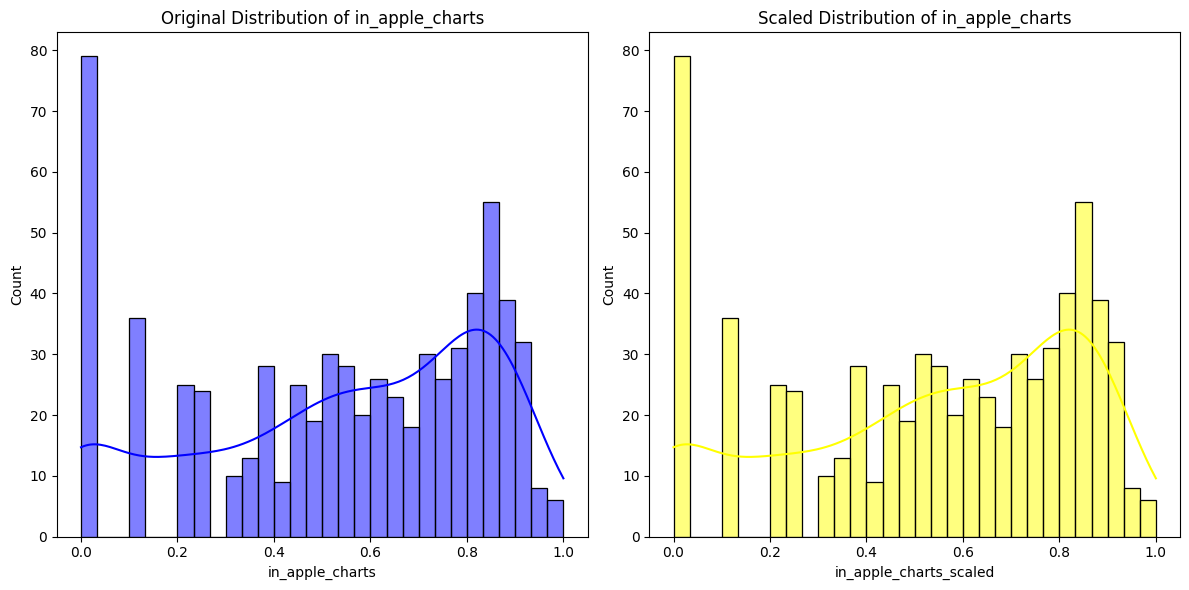

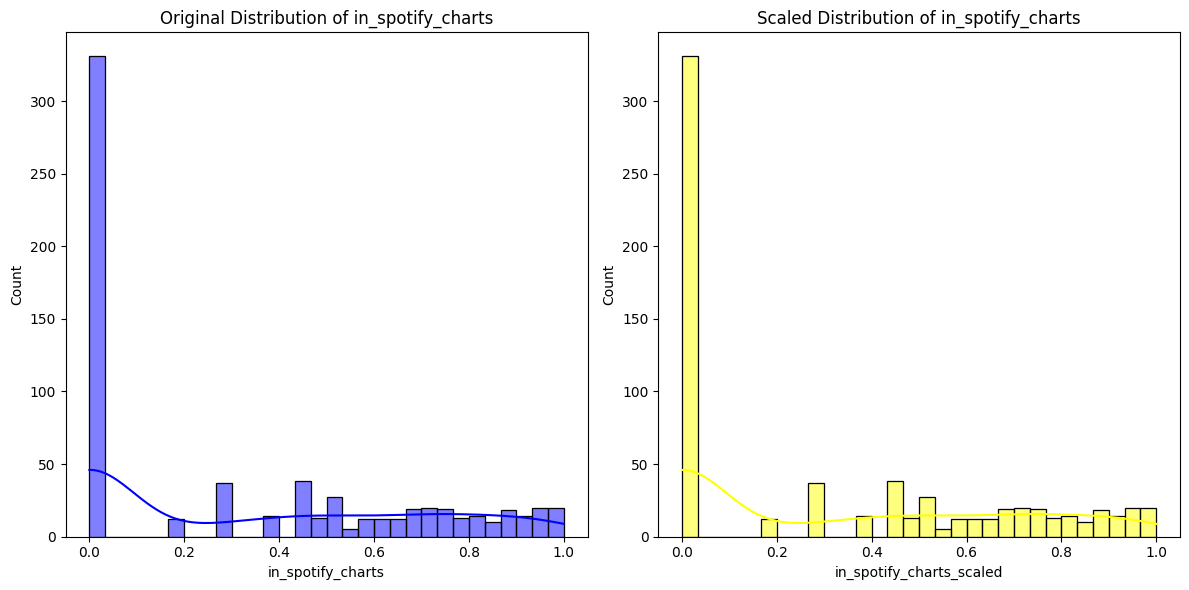

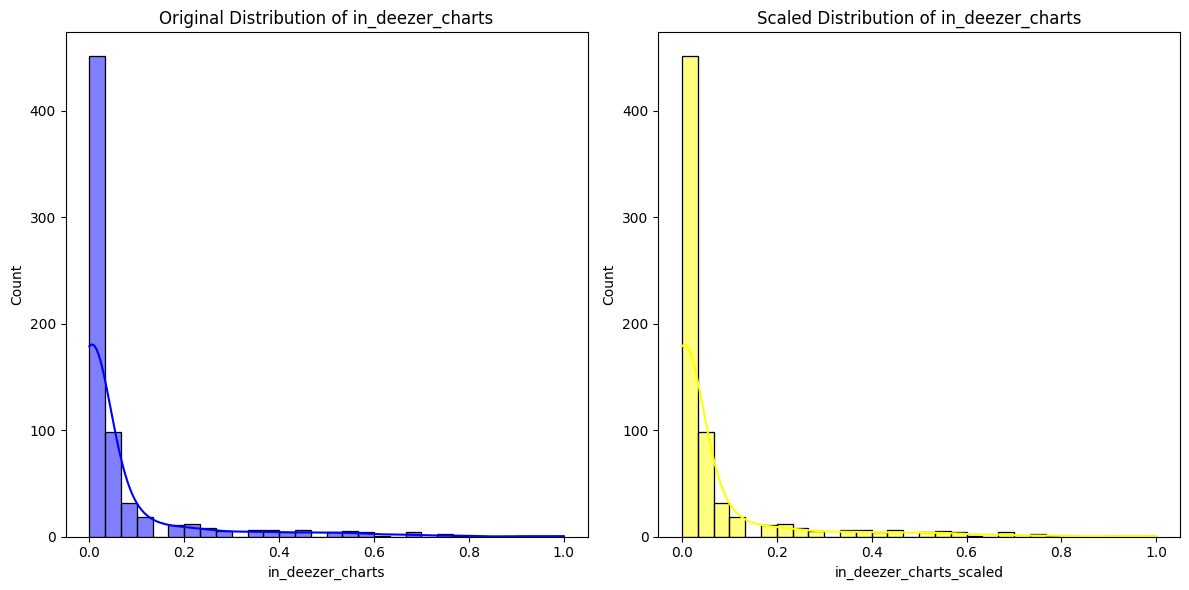

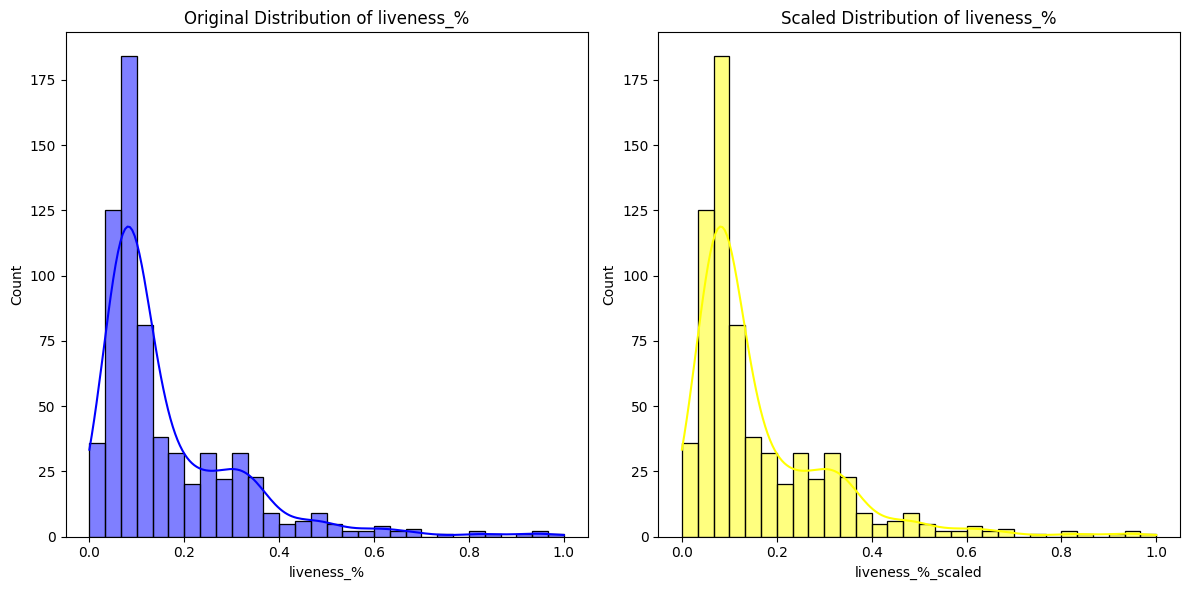

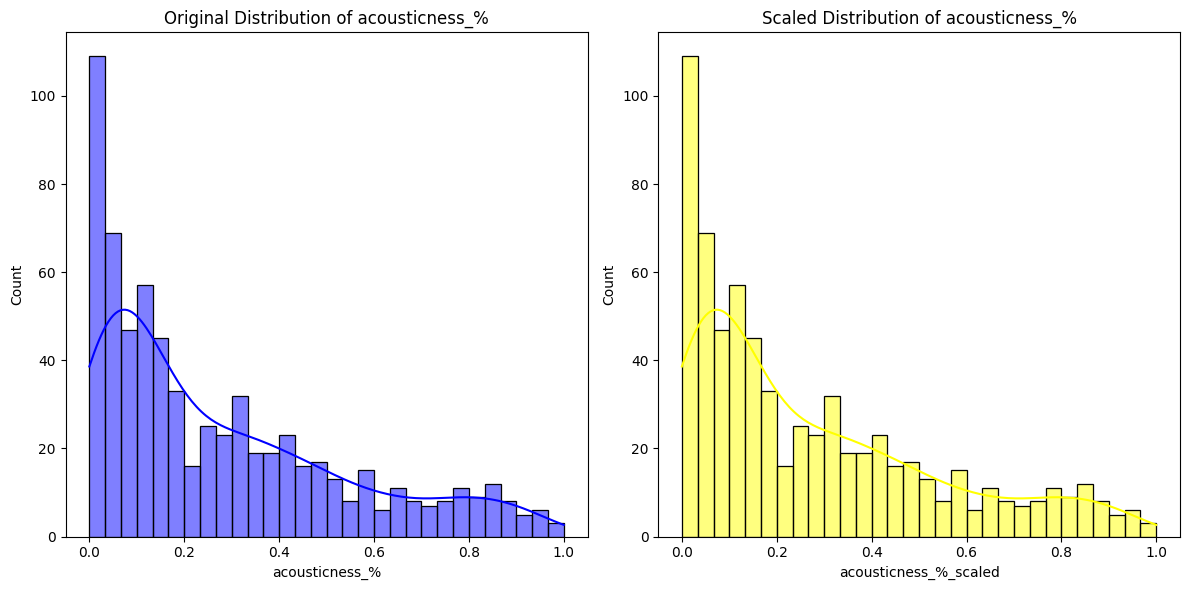

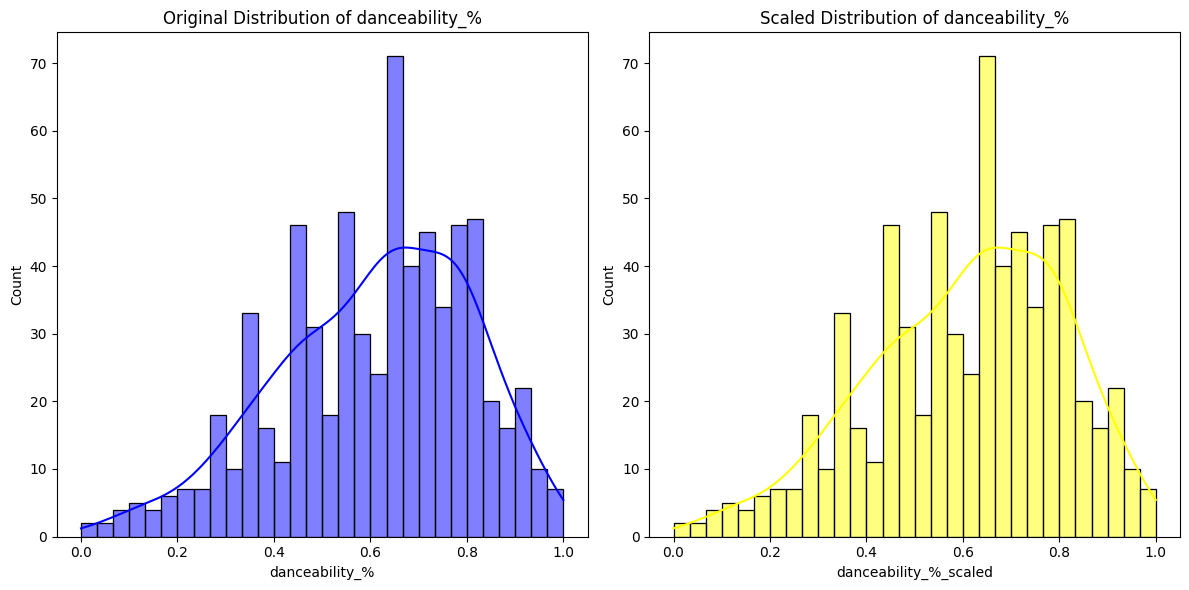

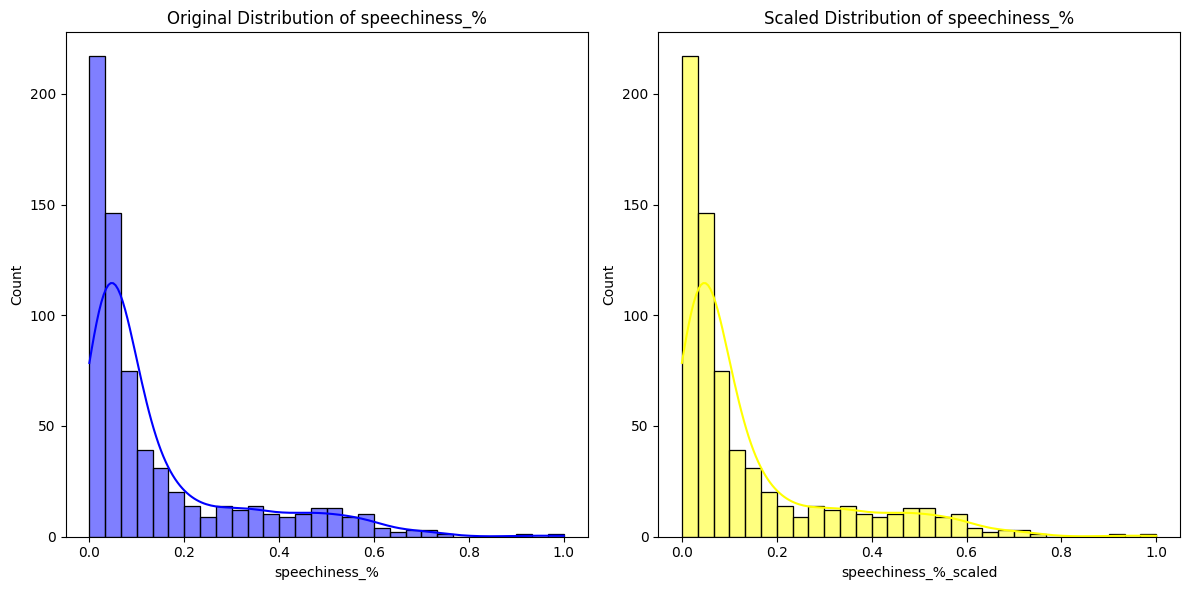

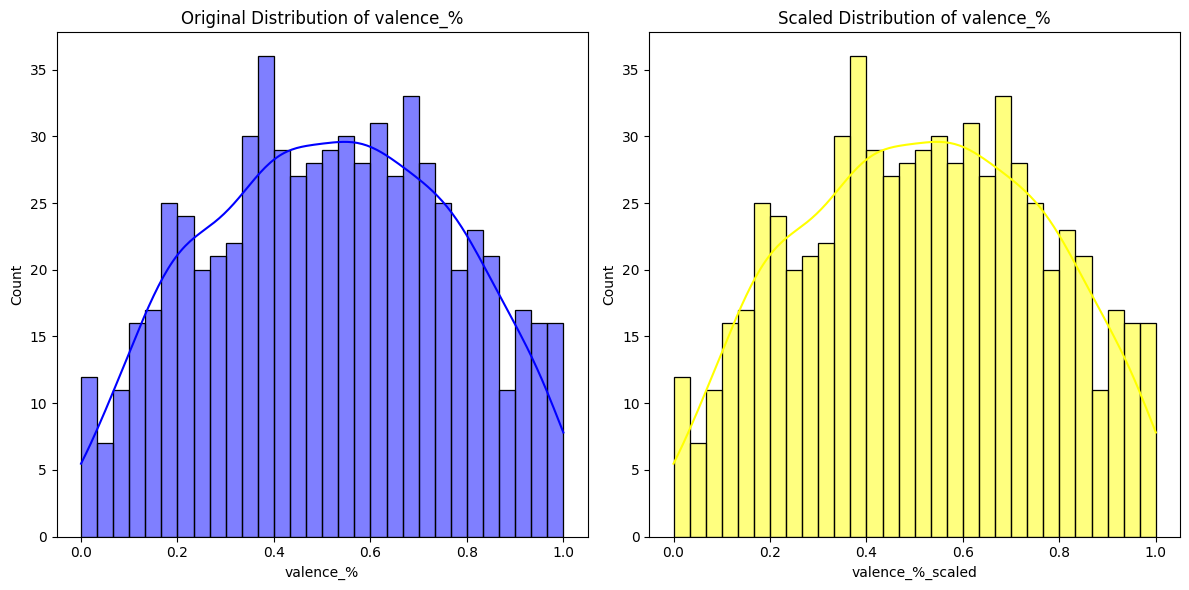

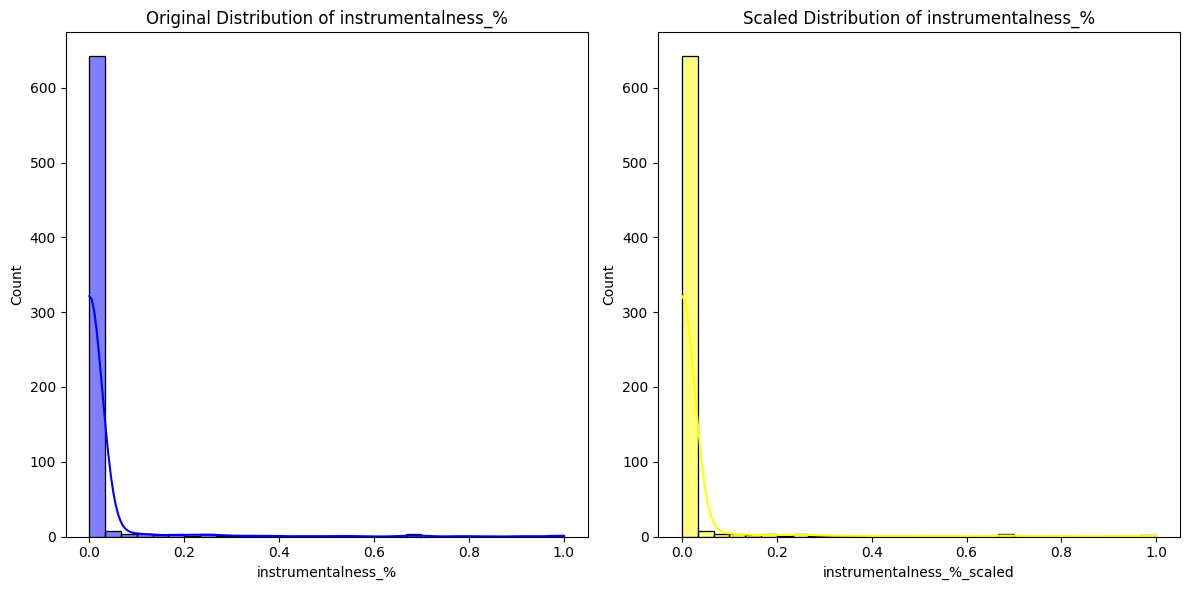

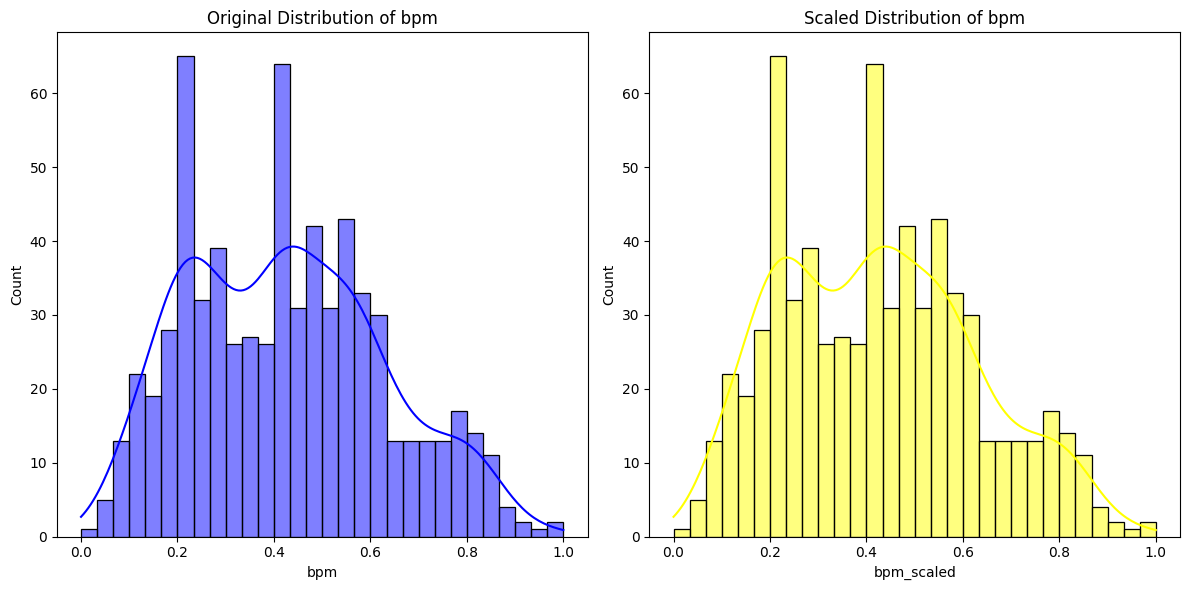

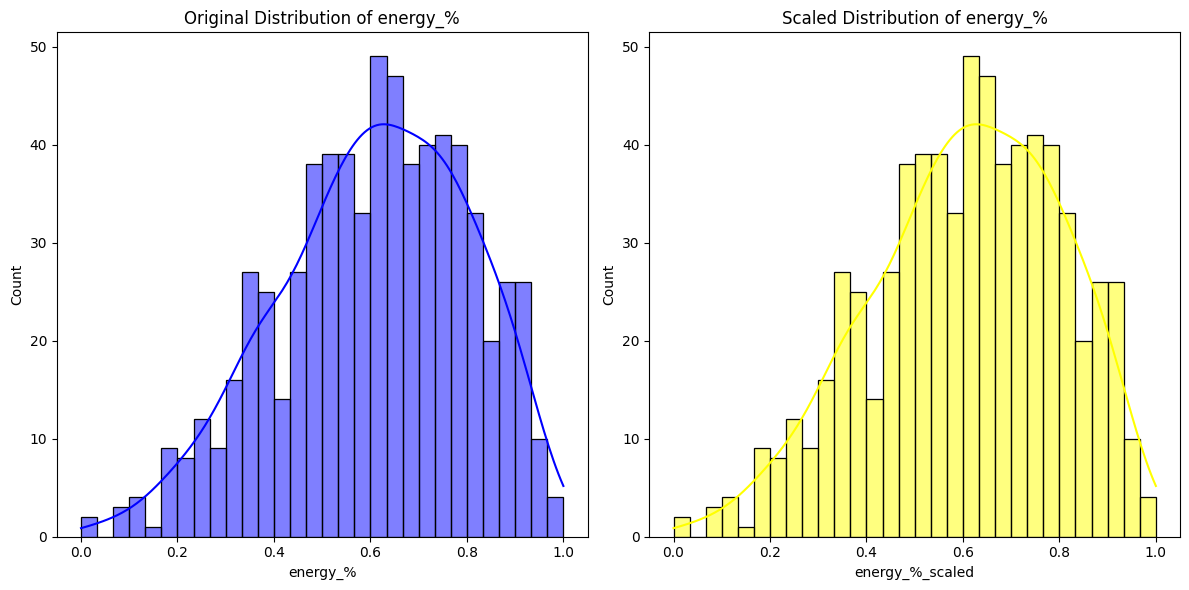

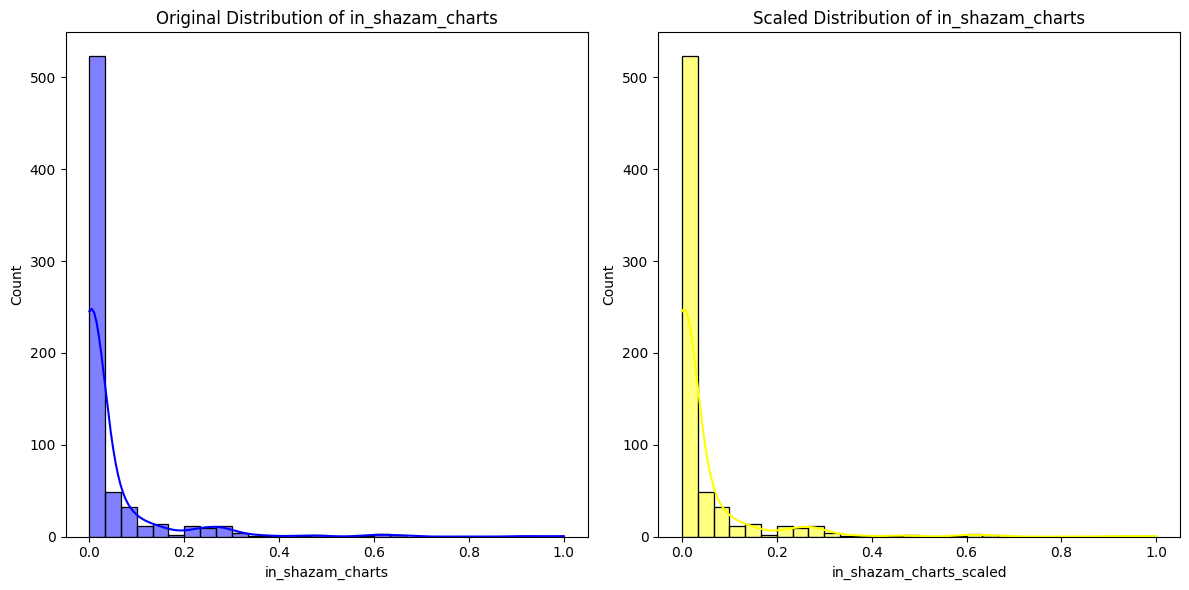

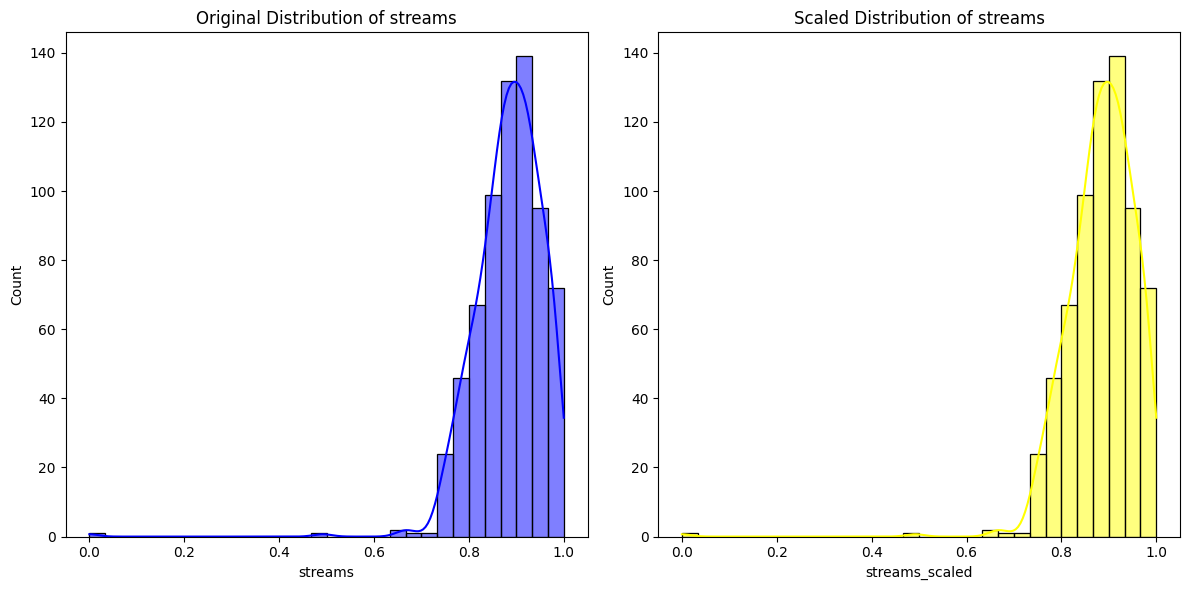

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

features_to_scale = [
    'in_spotify_playlists', 'in_apple_playlists', 'in_apple_charts', 'in_spotify_charts', 'in_deezer_charts', 'liveness_%', 'acousticness_%', 'danceability_%', 'speechiness_%', 'valence_%', 'instrumentalness_%', 'bpm', 'energy_%', 'in_shazam_charts', 'streams'
]

for feature in features_to_scale:
    df[f'{feature}_scaled'] = min_max_scaling(df[feature])

def plot_distributions(original, scaled, feature_name):
    plt.figure(figsize=(12, 6))
    
    # Plot original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(original, bins=30, kde=True, color='blue')
    plt.title(f'Original Distribution of {feature_name}')
    
    # Plot scaled distribution
    plt.subplot(1, 2, 2)
    sns.histplot(scaled, bins=30, kde=True, color='yellow')
    plt.title(f'Scaled Distribution of {feature_name}')
    
    plt.tight_layout()
    plt.show()

for feature in features_to_scale:
    plot_distributions(df[feature], df[f'{feature}_scaled'], feature)


### Replacing Original Features with Scaled Values in the DataFrame

In [72]:
df_backup = df.copy()
for feature in features_to_scale:
    df[feature] = df[f'{feature}_scaled']

df.drop(columns=[f'{feature}_scaled' for feature in features_to_scale], inplace=True)


## **Step 4 - Correlation Analysis**

### Heatmap of Scaled Features

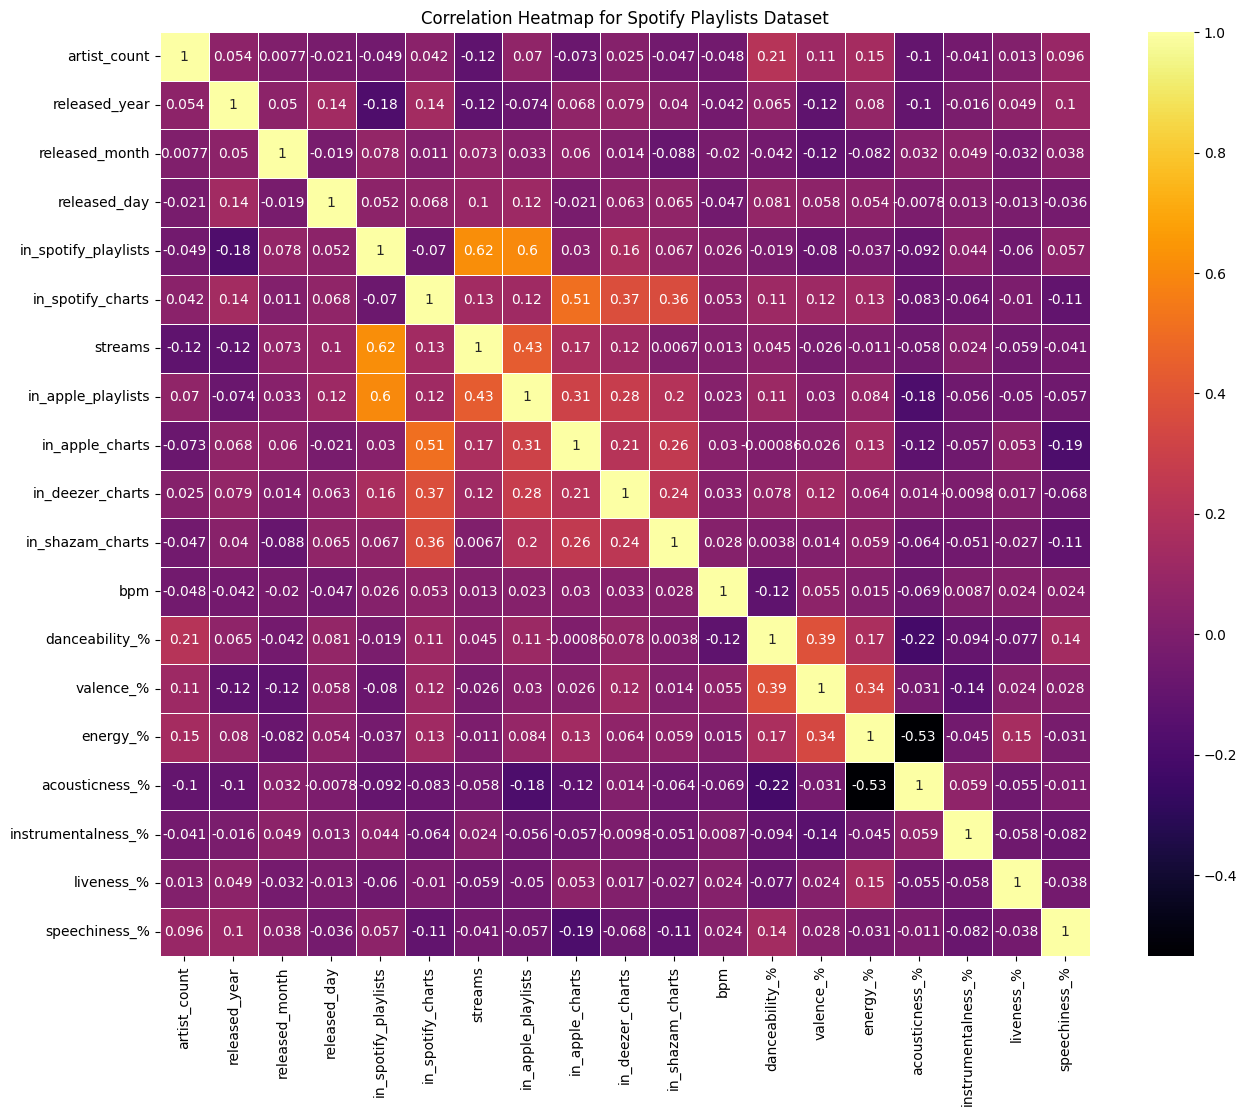

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=.5)
plt.title('Correlation Heatmap for Spotify Playlists Dataset')
plt.show()

### Top N Features Correlated with Streams

In [62]:
## This code prints the top N features that are most correlated with the 'streams' variable.

In [63]:
N = 22
top_correlated_features = correlation_matrix['streams'].abs().sort_values(ascending=False).head(N)
print("Top Correlated Features with 'streams':")
print(top_correlated_features)

top_feature_names = top_correlated_features.index.tolist()

print("List of Top Features:")
print(top_feature_names)

Top Correlated Features with 'streams':
streams                 1.000000
in_spotify_playlists    0.617522
in_apple_playlists      0.434928
in_apple_charts         0.167022
in_spotify_charts       0.133769
in_deezer_charts        0.122894
artist_count            0.119267
released_year           0.116369
released_day            0.100049
released_month          0.073466
liveness_%              0.059186
acousticness_%          0.057970
danceability_%          0.044548
speechiness_%           0.040883
valence_%               0.025982
instrumentalness_%      0.024384
bpm                     0.013172
energy_%                0.010856
in_shazam_charts        0.006717
Name: streams, dtype: float64
List of Top Features:
['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_apple_charts', 'in_spotify_charts', 'in_deezer_charts', 'artist_count', 'released_year', 'released_day', 'released_month', 'liveness_%', 'acousticness_%', 'danceability_%', 'speechiness_%', 'valence_%', 'instrumentalnes

# **Machine Learning Algorithm Implementation**


## Linear Regression Model Definition and Initialization

In [64]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.15, n_iterations=2000, l2_reg=0.1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.l2_reg = l2_reg
        self.weights, self.bias = None, None
        self.loss = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iterations):
            y_predict = np.dot(X, self.weights) + self.bias
            cost = (1 / n_samples) * np.sum((y_predict - y) ** 2) + (self.l2_reg * np.sum(self.weights**2))
            self.loss.append(cost)

            dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            db = (2 / n_samples) * np.sum(y_predict - y)

            # Update the parameters with regularization
            self.weights -= self.learning_rate * (dw + 2 * self.l2_reg * self.weights)
            self.bias -= self.learning_rate * db

            if i % 100 == 0:
                print(f'Iteration {i}, Loss: {cost}')

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


### The cost function is calculated as Mean Squared Error with L2 Regularization
### Implementation of Gradient Descent Optimization Algorithm to minimize the cost function

# Model Evaluation

## Data Preparation

In [65]:
selected_features = [
    'in_spotify_playlists', 'in_apple_playlists', 'in_apple_charts', 'in_spotify_charts', 'in_deezer_charts', 'bpm', 'in_shazam_charts'
]

target_variable = 'streams'

X = df[selected_features].to_numpy()
y = df[target_variable].to_numpy()

# Split the dataset into training and testing sets
split_ratio = 0.8
indices = np.random.permutation(df.shape[0])
split_index = int(split_ratio * df.shape[0])

train_indices, test_indices = indices[:split_index], indices[split_index:]
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

## Model Training

### Instantiate and train the LinearRegressionGD model

In [66]:
model = LinearRegressionGD(l2_reg=0.01)

model.fit(X_train, y_train)


Iteration 0, Loss: 0.7849710166322642
Iteration 100, Loss: 0.004758191699326495
Iteration 200, Loss: 0.004060053680326483
Iteration 300, Loss: 0.003969385034561491
Iteration 400, Loss: 0.003954535096614026
Iteration 500, Loss: 0.003951491395389002
Iteration 600, Loss: 0.003950762936740552
Iteration 700, Loss: 0.003950574033932496
Iteration 800, Loss: 0.003950523293786574
Iteration 900, Loss: 0.003950509466109216
Iteration 1000, Loss: 0.003950505675225731
Iteration 1100, Loss: 0.003950504633211681
Iteration 1200, Loss: 0.003950504346410253
Iteration 1300, Loss: 0.003950504267408289
Iteration 1400, Loss: 0.0039505042456337265
Iteration 1500, Loss: 0.0039505042396292675
Iteration 1600, Loss: 0.00395050423797277
Iteration 1700, Loss: 0.003950504237515588
Iteration 1800, Loss: 0.003950504237389357
Iteration 1900, Loss: 0.00395050423735449


## Performance Evaluation Metrics

In [67]:
import numpy as np

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Evaluate the model on train data
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluate the model on test data
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train Data:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAE: {mae_train}")
print(f"R^2 Score: {r2_train}")

print("\nTest Data:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R^2 Score: {r2_test}")


Train Data:
MSE: 0.0035953659845403977
RMSE: 0.059961370769357814
MAE: 0.03755567309190075
R^2 Score: 0.38523338081431435

Test Data:
MSE: 0.0014893011927136924
RMSE: 0.03859146528332
MAE: 0.03173903608482878
R^2 Score: 0.5588776464621223


## Bias - Varience Trade Off

Iteration 0, Loss: 0.7543118265650477
Iteration 100, Loss: 0.0014014953510547363
Iteration 200, Loss: 0.001039002170445439
Iteration 300, Loss: 0.0007702669219544011
Iteration 400, Loss: 0.0005710393567346875
Iteration 500, Loss: 0.00042334149065181934
Iteration 600, Loss: 0.0003138452990913059
Iteration 700, Loss: 0.00023267001684633437
Iteration 800, Loss: 0.00017249051330708024
Iteration 900, Loss: 0.0001278762841221188
Iteration 1000, Loss: 9.480141097249343e-05
Iteration 1100, Loss: 7.028126899428036e-05
Iteration 1200, Loss: 5.210319889520981e-05
Iteration 1300, Loss: 3.862684003805803e-05
Iteration 1400, Loss: 2.8636106860281445e-05
Iteration 1500, Loss: 2.1229451213340382e-05
Iteration 1600, Loss: 1.5738508066706373e-05
Iteration 1700, Loss: 1.1667783292020696e-05
Iteration 1800, Loss: 8.64994104730589e-06
Iteration 1900, Loss: 6.412655964653931e-06
Iteration 0, Loss: 0.7346923835627093
Iteration 100, Loss: 0.0015464611554670761
Iteration 200, Loss: 0.0010847487397070727
Iterat

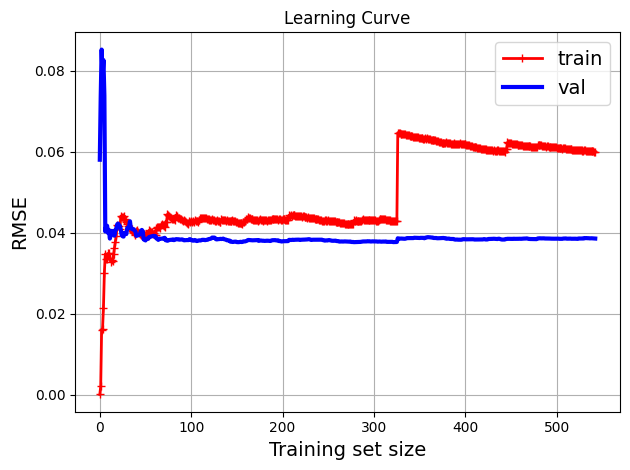

In [68]:

def plot_learning_curve(X_train, y_train, X_val, y_val):
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model = LinearRegressionGD(l2_reg=0.01)
        model.fit(X_train[:m], y_train[:m])

        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.title("Learning Curve")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Calling the function to plot the learning curve
plot_learning_curve(X_train, y_train, X_test, y_test)


In [69]:
### Improvising

In [70]:
# import numpy as np
# import pandas as pd

# def scale_features(X):
#     """Scale features to have zero mean and unit variance."""
#     return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# results = []

# selected_features = ['in_spotify_playlists', 'in_apple_playlists', 'in_apple_charts', 'in_spotify_charts', 'in_deezer_charts', 'artist_count', 'released_year', 'released_day', 'released_month', 'liveness_%', 'acousticness_%', 'danceability_%', 'speechiness_%', 'valence_%', 'instrumentalness_%', 'bpm', 'energy_%', 'in_shazam_charts']  # your features

# # Check for NaN values in the dataset
# if df[selected_features].isnull().any().any():
#     raise ValueError("Data contains NaN values. Please clean the data before training.")

# # Iterate through each feature to be excluded
# for feature in selected_features:
#     # Create a temporary list of features excluding the current feature
#     temp_features = [f for f in selected_features if f != feature]

#     # Extract features and target variable based on the temporary feature list
#     X_temp = df[temp_features].to_numpy()
#     y_temp = df[target_variable].to_numpy()

#     # Scale the features
#     X_temp = scale_features(X_temp)

#     # Split the dataset into training and testing sets
#     train_indices, test_indices = indices[:split_index], indices[split_index:]
#     X_train_temp, X_test_temp = X_temp[train_indices], X_temp[test_indices]
#     y_train_temp, y_test_temp = y_temp[train_indices], y_temp[test_indices]

#     # Instantiate and train the LinearRegressionGD model with the current feature set
#     temp_model = LinearRegressionGD()
#     temp_model.weights = np.random.randn(X_train_temp.shape[1]) * 0.01  # initialize weights to small random numbers
#     temp_model.fit(X_train_temp, y_train_temp)

#     # Make predictions on the test set
#     y_pred_temp = temp_model.predict(X_test_temp)

#     # Evaluate the model using the temporary test set
#     mse = mean_squared_error(y_test_temp, y_pred_temp)
#     rmse = root_mean_squared_error(y_test_temp, y_pred_temp)
#     mae = mean_absolute_error(y_test_temp, y_pred_temp)
#     r2 = r2_score(y_test_temp, y_pred_temp)

#     # Append results to the results list
#     results.append([feature, mse, rmse, mae, r2])

# # Convert the results to a DataFrame and save to CSV
# results_df = pd.DataFrame(results, columns=['Excluded_Feature', 'MSE', 'RMSE', 'MAE', 'R2_Score'])
# results_df.to_csv('leave_one_out_feature_importance.csv', index=False)
